C:\Users\Muhammad Qasim\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Beta =  nan


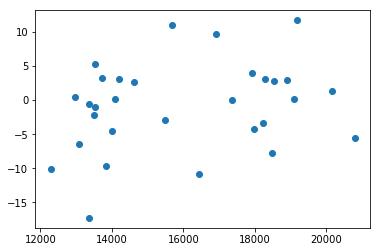

In [1]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df


def load_data():
    #Get daily price data for January only
    df = daily_price_historical('BTC','USD')
    mask = (df['timestamp'] >= '2018-01-01') & (df['timestamp'] <= '2018-01-31')
    df = df.loc[mask]

    #calculate the return
    y_train=(df['close']-df['open'])*100/(df['open'])


    df = pd.read_csv('index.csv')
    mask = (df['Date'] >= '2018-01-01') & (df['Date'] <= '2018-01-31')
    df = df.loc[mask]
    x_train = df['Close']
    #print((x_train))
    #print(y_train)
    return x_train,y_train




def model(X, w1,w2):
    return tf.add(tf.multiply(X, w1),w2)

def regress_tensorflow(x_train,y_train):
    learning_rate = 0.000001
    training_epochs = 1000
    X = tf.placeholder(tf.float32)
    Y = tf.placeholder(tf.float32)


    w1 = tf.Variable(0.0, name="weight1")
    w2 = tf.Variable(0.0, name="weight2")

    y_model = model(X, w1,w2)

    cost = tf.square(Y-y_model)
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(x_train, y_train):
            sess.run(train_op, feed_dict={X: x, Y: y})

    w_val1 = sess.run(w1)
    w_val2 = sess.run(w2)
    print("Beta = ",w_val1)
    sess.close()
    plt.scatter(x_train, y_train)
    y_learned = x_train*w_val1+w_val2
    plt.plot(x_train, y_learned, 'r')
    plt.show()







regress_tensorflow(*load_data())


In [11]:
abc=[{'name':'qasim','age':25},{'name':'ali','age':22}]
records=pd.DataFrame(abc)
records.name

0    qasim
1      ali
Name: name, dtype: object

In [22]:
def load_data():
    

    df = pd.read_csv('index.csv')
    mask = (df['Date'] >= '2018-01-01') & (df['Date'] <= '2018-01-31')
    df = df.loc[mask]
    x_train = df['Close']
    print((x_train, y_train))
    #print(y_train)
    #return x_train,y_train
load_data()

NameError: name 'y_train' is not defined

ConnectionError: HTTPSConnectionPool(host='min-api.cryptocompare.com', port=443): Max retries exceeded with url: /data/histoday?fsym=BTC&tsym=USD&limit=1&aggregate=1&allData=true (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x000001AF2D1A6EF0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [43]:
abc=[1,2,3,'nan',3,33,44]
print([x for x in abc if not math.isnan(x)])

TypeError: must be real number, not str

In [46]:
x = [1400, 1500, 1600, nan, nan, nan ,1700] #Not in this exact configuration
import math
print ([value for value in x if not math.isnan(value)])

NameError: name 'nan' is not defined

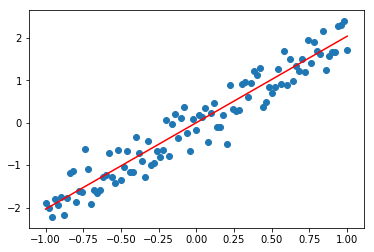

In [65]:
import tensorflow as tf #A
import numpy as np #A
import matplotlib.pyplot as plt #A
learning_rate = 0.01 #B
training_epochs = 100 #B
x_train = np.linspace(-1, 1, 101) #C
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33 #C

X = tf.placeholder(tf.float32) #D
Y = tf.placeholder(tf.float32) #D
def model(X, w): #E
    return tf.multiply(X, w)

w = tf.Variable(0.0, name="weights") #F
y_model = model(X, w) #G
cost = tf.square(Y-y_model) #G
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #H
sess = tf.Session() #I
init = tf.global_variables_initializer() #I
sess.run(init) #I

for epoch in range(training_epochs): #J
    for (x, y) in zip(x_train, y_train): #K
        sess.run(train_op, feed_dict={X: x, Y: y}) #L
w_val = sess.run(w) #M
sess.close() #N
plt.scatter(x_train, y_train) #O
y_learned = x_train*w_val #P
plt.plot(x_train, y_learned, 'r') #P
plt.show() #P

In [66]:
y_learned

array([-2.03761387, -1.99686159, -1.95610931, -1.91535704, -1.87460476,
       -1.83385248, -1.7931002 , -1.75234793, -1.71159565, -1.67084337,
       -1.63009109, -1.58933882, -1.54858654, -1.50783426, -1.46708199,
       -1.42632971, -1.38557743, -1.34482515, -1.30407288, -1.2633206 ,
       -1.22256832, -1.18181604, -1.14106377, -1.10031149, -1.05955921,
       -1.01880693, -0.97805466, -0.93730238, -0.8965501 , -0.85579782,
       -0.81504555, -0.77429327, -0.73354099, -0.69278872, -0.65203644,
       -0.61128416, -0.57053188, -0.52977961, -0.48902733, -0.44827505,
       -0.40752277, -0.3667705 , -0.32601822, -0.28526594, -0.24451366,
       -0.20376139, -0.16300911, -0.12225683, -0.08150455, -0.04075228,
        0.        ,  0.04075228,  0.08150455,  0.12225683,  0.16300911,
        0.20376139,  0.24451366,  0.28526594,  0.32601822,  0.3667705 ,
        0.40752277,  0.44827505,  0.48902733,  0.52977961,  0.57053188,
        0.61128416,  0.65203644,  0.69278872,  0.73354099,  0.77

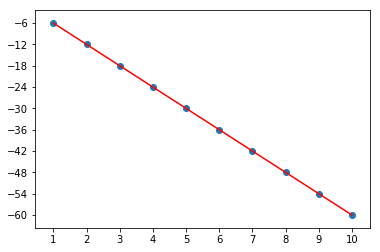

[ -6. -12. -18. -24. -30. -36. -42. -48. -54. -60.]


In [18]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(1,11, dtype=float)
y=-6.0*x
plt.plot(x,y,color='r')
plt.scatter(x,y)
plt.xticks(x)
plt.yticks(y)
plt.show()
print(y)

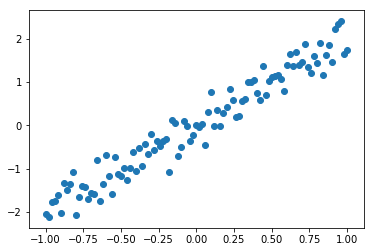

101


In [26]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(-1,1,101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.3

plt.scatter(x_train, y_train)
plt.show()
print(x_train.size)

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1,1,101)
y_train = 2 * x_train +np.random.randn(*x_train.shape) * 0.33

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X,w):
    return tf.multiply(X,w)

w=tf.Variable(0.0, name='weights')

y_model = model(X,w)
cost=tf.square(Y-y_model)
train_op=tf.train.GradientDecentOptimizer(learning_rate).minimize(cost)

sess = tf.Session() #I
init = tf.global_variables_initializer() #I
sess.run(init) #I

for epoch in range(training_epochs): #J
    for (x, y) in zip(x_train, y_train): #K
        sess.run(train_op, feed_dict={X: x, Y: y}) #L
w_val = sess.run(w) #M
sess.close() #N
plt.scatter(x_train, y_train) #O
y_learned = x_train*w_val #P
plt.plot(x_train, y_learned, 'r') #P
plt.show() #P

AttributeError: module 'tensorflow.python.training.training' has no attribute 'GradientDecentOptimizer'